# Will a Degree *Really* Make You Happier?

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

This project seeks to determine weather or not having a Bachelor's Degree affects the average home price for a city, as well as how happy that city is. We feel that because having a Bachelor's Degree can impact one's life so greatly (better job prospects, higher pay, different social circles), it is bound to have some kind of impact. The US Census publishes happiness scores collected from individual cities, as well as the number of College Grads in a given city. Zillow, on the other hand, publishes housing data each year through their API, so it can be taken from there. 

In order to accomplish this analysis, we will preform the following steps:
1) Pull in, clean, and organize data into one place.
2) Look at the data as a whole using a Scatterplot, in order to see any major patterns.
3) Compare individual variables against eachother, in order to delve deeper into the patterns.

# Names

- David Soberanis 
- Yewon Hong 
- Andrew Burda
- Zach Lloyd
- Lawrence Kuo


<a id='research_question'></a>
# Research Question

How does an undergrad diploma affect housing cost and happiness?

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


Our team feels that having a Bachelor's Degree __will__ positively affect average happiness, which will drive up the housing cost for a given location, because as certain cities are seen as happier, more people will move there. We feel this is the case because having a Bachelor's Degree opens up the opportunity for higher pay, and a cushier lifestyle and job, both of which are generally seen as very good things.

# Dataset(s)

Set 1: Happiness data
- Dataset Name: happiness_raw_data.csv
- Link to the original dataset: https://wallethub.com/edu/happiest-places-to-live/32619
- Link to the local dataset: https://github.com/COGS108/Group076-Wi22/blob/6e034ac40c772d62c4900041e9eef13abf3c043c/happiness_raw_data.csv
- Number of observations:  183
- Contains a happiness score based on Emotional & Physical Well-Being, Income & Employment, and Community & Environment. It ranks every major city in the United States by a total happiness score, below we take the total score and use that as our happiness score for each city.
 
Set 2: House price and region data
- Dataset Name: zillow_raw_data.csv
- Link to the dataset: https://www.zillow.com/research/data/
- Link for JSON: https://github.com/COGS108/Group076-Wi22/blob/6e034ac40c772d62c4900041e9eef13abf3c043c/final_data.json
- Number of observations: 394,743
- Contains every region in the United States and information including price and city size data. Price and city size data were converted into a JSON below. Both happiness data and house region data were combined below.
 
Set 3: Education attainment rate
- Dataset Name: Education attainment rate: places within the United States of America(2019)
- Link to the dataset: https://datacommons.org/tools/timeline#&place=country/USA,geoId/06,geoId/48,geoId/12,geoId/36,geoId/42&statsVar=Count_Person_EducationalAttainmentNoSchoolingCompleted__Count_Person_EducationalAttainmentRegularHighSchoolDiploma__Count_Person_EducationalAttainmentBachelorsDegree__Count_Person_EducationalAttainmentMastersDegree__Count_Person_EducationalAttainmentDoctorateDegree&pc&denom=Count_Person_25OrMoreYears
- Link to raw dataset: https://github.com/COGS108/Group076-Wi22/blob/6e034ac40c772d62c4900041e9eef13abf3c043c/education_states.csv
- Number of observations: 240
- Contains the highest grade achieved rate for 5 major states in the US. This will be later expanded to include attainment for all US cities. 

Set 4: Bachelor count by city for 2017 (can modify to include data from 2009-2017)
- Link to the dataset: https://data.diversitydatakids.org/dataset/15002_1_c-adults-aged-25--with-a-college-degree--count--by-race-ethnicity/resource/77e85af3-f289-42ba-b264-34fe9a381ce8
- Link to raw dataset: https://github.com/COGS108/Group076-Wi22/blob/18143201429f84edaf35be20f1552207cba32ddf/bach_by_city_raw.csv
- Number of observations: 5,152
- Contains the number of people with bachelor degress in each city for the United States. 


# Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="ticks")

In [2]:
# sets up raw_housing_data_df and raw_happiness_data_df 
raw_housing_data_df = pd.read_csv('zillow_raw_data.csv')

# This data is assumed to be from 2017 [the last known census year for this data]
raw_happiness_data_df = pd.read_csv('happiness_raw_data.csv') 

# Note source includes data from 2009-2017 might impact our time scope
bach_df = pd.read_csv("bach_by_city_raw.csv")


# Data Cleaning

Describe your data cleaning steps here.

- Cut all years from data except for 2017, in order to create consistency across datasets.

In [3]:
raw_housing_data_df = raw_housing_data_df[['SizeRank', 'RegionName', 'StateName', '2017-12-31']] # '2017-12-31' == 2017 in this data

bach_df = bach_df[bach_df['year']==2017]


- Cleaning Functions

In [4]:
def get_only_city_name(regionName):
    '''
        Function takes Str as input.
        Returns the last element of the String
        split on '-' character, which will be a city
        name. Return type is Str.
    '''
    return regionName.split(',')[0]

def remove_city(str_in):
    '''
        Function takes Str as input.
        Returns string missing 'city' 
        if it was present as Str.
    '''
    return str_in.replace('city', '')

- Clean City names across datasets, make them match eachother's formats.

In [5]:
# Set RegionName in housing data to just be city (get rid of dashes)
raw_housing_data_df["RegionName"] = raw_housing_data_df["RegionName"].apply(get_only_city_name)

raw_housing_data_df.columns = ['City' if x=='RegionName' else x for x in raw_housing_data_df.columns]

raw_housing_data_df.columns = ['Price' if x=='2017-12-31' else x for x in raw_housing_data_df.columns]

raw_happiness_data_df["City"] = raw_happiness_data_df["City"].apply(get_only_city_name)

raw_happiness_data_df = raw_happiness_data_df[["City", "Total Score"]]

- Clean Bachelor's Data, add column names, set City to be consistent across dataframes.

In [6]:
bach_df = bach_df.iloc[:,[1,3]]
bach_df.columns = ['City', 'Total Bachelors']
bach_df = bach_df.reset_index(drop=True)
bach_df[['City','State']] = bach_df.City.str.split(", ",expand=True)
bach_df['City'] = bach_df['City'].apply(remove_city)
bach_df = bach_df[['City', 'State', 'Total Bachelors']]
bach_df.columns = ['StateName' if x=='State' else x for x in bach_df.columns]

- Merge datasets for Analaysis

In [7]:
total_df = raw_housing_data_df.merge(raw_happiness_data_df, how='inner', on='City')
total_df['Number Bachelors'] = bach_df["Total Bachelors"]

total_df.columns = ['Happiness Score' if x=='Total Score' else x for x in total_df.columns]

total_df = total_df.dropna()

total_df.head()

,SizeRank,City,StateName,Price,Happiness Score,Number Bachelors
0,1,New York,NY,451734.0,50.91,39370
1,3,Chicago,IL,229414.0,55.65,11990
2,5,Philadelphia,PA,231231.0,45.80,34745
3,6,Houston,TX,205145.0,50.83,56011
4,7,Washington,DC,408793.0,59.59,38710


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [63]:
# take a look at some descriptive statistics
total_df.describe()

,SizeRank,Price,Happiness Score,Number Bachelors,total_df_log10
count,168.000000,1.680000e+02,168.000000,168.000000,168.000000
mean,210.797619,2.104573e+05,53.549405,43240.083333,1.724424
std,233.855336,1.400707e+05,8.314438,90789.175932,0.067014
min,1.000000,6.498900e+04,34.290000,1545.000000,1.536432
25%,46.750000,1.352070e+05,47.792500,14298.750000,1.680266
50%,110.500000,1.711205e+05,52.445000,22791.000000,1.720531
75%,295.250000,2.425640e+05,59.070000,39990.500000,1.772102
max,822.000000,1.195041e+06,73.660000,952422.000000,1.867821


- ScatterMatrix for all data against eachother, with the hue as the number of bachelors

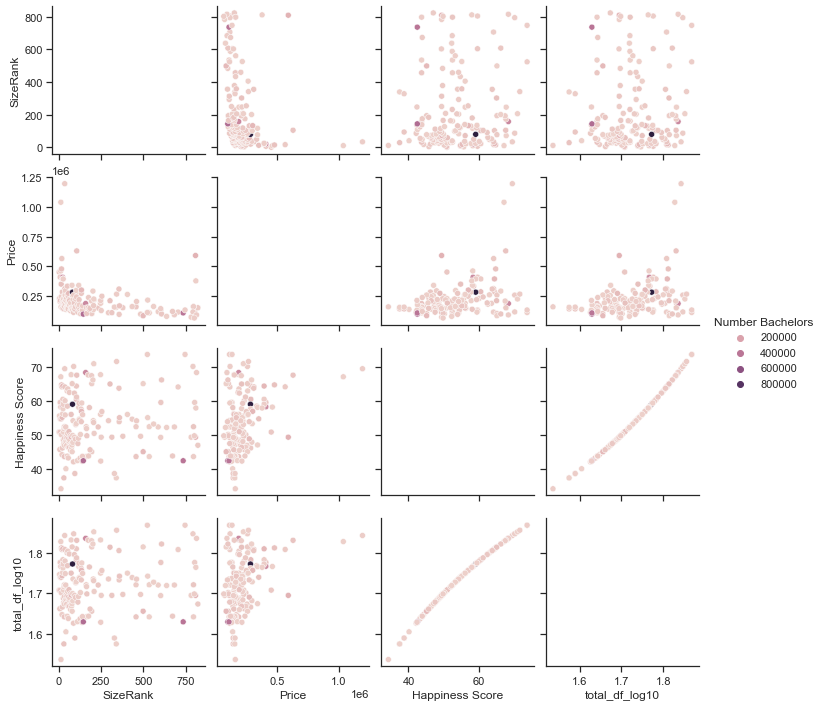

In [64]:
sns.pairplot(total_df, hue="Number Bachelors")

- Lineplot of number of bachelors against the happiness score

<AxesSubplot:xlabel='Number Bachelors', ylabel='Happiness Score'>

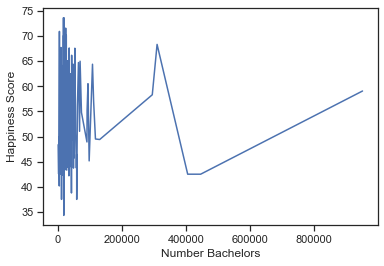

In [65]:
sns.lineplot(data=total_df, x="Number Bachelors", y="Happiness Score")

- Lineplot of number of bachelors against the home price

<AxesSubplot:xlabel='Number Bachelors', ylabel='Price'>

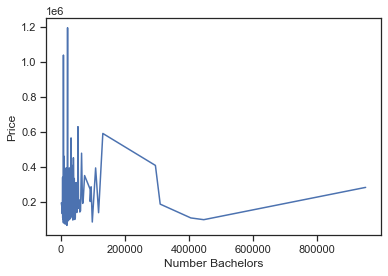

In [66]:
sns.lineplot(data=total_df, x="Number Bachelors", y="Price")

- Lineplot of happiness score against home price

<AxesSubplot:xlabel='Happiness Score', ylabel='Price'>

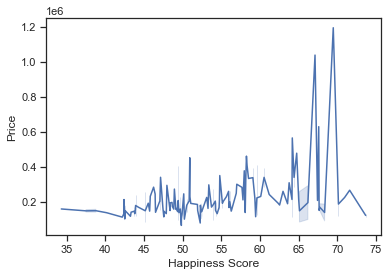

In [67]:
sns.lineplot(data=total_df, x="Happiness Score", y="Price")

- Range and Scatterplot of happiness score against independent variables (price, number of bachelors)

Range for Happiness Score 39.37
Range for Price 1130052.0
Range for Number Bachelors 950877


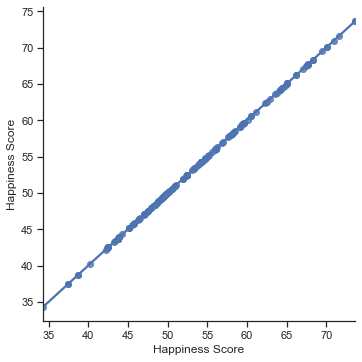

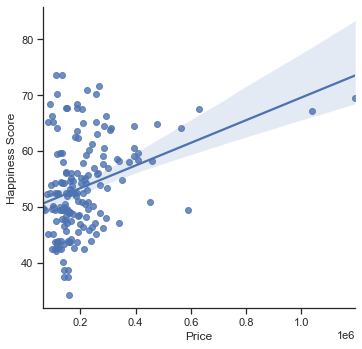

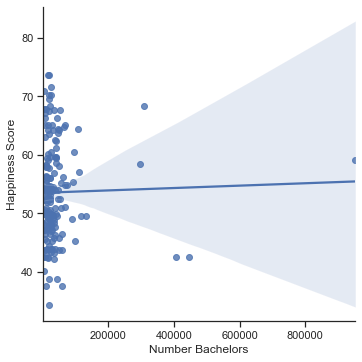

In [68]:
independent_variables = ['Happiness Score', 'Price', 'Number Bachelors']
# for loop to find the range for each independent variables
for i in independent_variables:
    the_range = total_df[i].max() - total_df[i].min()
    print('Range for',i,the_range)

# for loop to see graph each independent variables with Happiness Score
for i in independent_variables:
    sns.lmplot(
        data = total_df,
        x = i,
        y = 'Happiness Score'
    )

<AxesSubplot:xlabel='total_df_log10', ylabel='Count'>

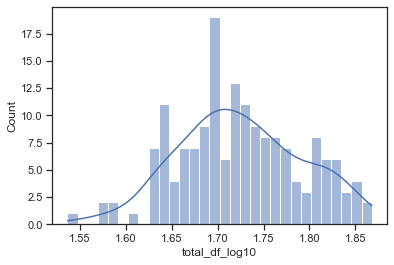

In [69]:
total_df['total_df_log10'] = np.log10(total_df['Happiness Score']+0.1)
sns.histplot(total_df['total_df_log10'], bins=30, kde=True)

- Heatmap to visualize the result and compare each variable in total_df data

<AxesSubplot:>

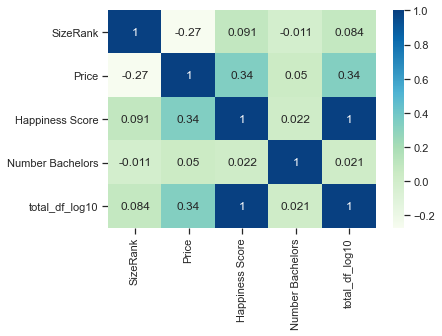

In [70]:
# correation matrix and heatmap
correlation = total_df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot=True)

- Lineplot

<AxesSubplot:xlabel='Number Bachelors', ylabel='Price'>

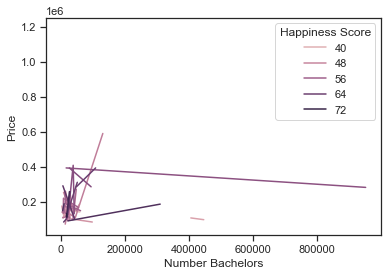

In [46]:
sns.lineplot( x='Number Bachelors' ,y='Price' ,hue = 'Happiness Score', data = total_df)

# Ethics & Privacy

Data bias may result from the characteristic that data does not represent the whole and only represents part of it.

First, the bias that may appear in happiness_raw_data is that since the data appear in various cities, there may be differences in income and results depending on the region. As a potential bias in the dataset, data collection may have appeared differently for each city. This is because how data was collected may vary from city to city, and bias exists whether the number of data is either large or small.

**I will add more
    
As data became closer to our daily lives, people all became 'data consumers'. However, these data,
as it had been investigated by reliable sources, as it guarantees anonymity of the people collected, cannot predict who answers what results and what situations they are, So data privacy has not been a big problem in this project.

**I will add more


# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

Zach: Helped organize and maintain code, check and debug, and wrote most of the data cleaning.

Yewon: Part of data analysis (EDA) and wrote most of ethics and privacy.